In [47]:
from PIL import Image, ImageDraw
import math
import numpy as np
import random

In [45]:
img = Image.open("target_images/cross,Blue,Q,Yellow.png")
img
bgd_img = Image.open("master_background.png")

In [38]:
theta = random.randint(0,90)
theta_rad = math.radians(theta)
bbox = [0,0,0,0]
bbox[0] = math.sin(theta_rad)*26
bbox[1] = math.cos(theta_rad)*26
bbox[2] = math.cos(theta_rad)*34
bbox[3] = math.sin(theta_rad)*34

print(theta)

60


(44, 40)
(10681, 11924)


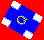

In [46]:
rot_img = img.rotate(theta,expand=True,fillcolor="Red")
print(rot_img.size)
print(bgd_rot_img.size)
rot_img.save("test.png")
bgd_rot_img.show()
rot_img

In [18]:
drw_img = ImageDraw.Draw(rot_img)
drw_img.point([0,tl],fill="Green")
drw_img.point([tr,0],fill="Blue")
drw_img.point([rot_img.width-1,br],fill="Yellow")
drw_img.point([bl,rot_img.height-1],fill="Purple")
rot_img.save("test.png")
rot_img.show()

In [108]:
from PIL import ImageTransform
pog = bgd_rot_img.transform((200,100),(0,0,200,0,200,100,0,100))
pog.show()

SyntaxError: positional argument follows keyword argument (47583509.py, line 2)

In [109]:
lis = [0,[0,0]]
np.flatten(lis)

AttributeError: module 'numpy' has no attribute 'flatten'

In [105]:
width = 10000
height = 7000
valid = False
target = Polygon([[5067, 3567], [5088, 3552], [5108, 3579], [5086, 3595]])
while valid == False:
    rot = random.randint(0,359)
    rot_tht = math.radians(rot)
    corner = [random.randint(0,width),random.randint(0,height)]
    print(corner)
    box = [[0,0],[4032,0],[4032,3040],[0,3040]]
    rot_arr = [[math.cos(rot_tht),-1*math.sin(rot_tht)],[math.sin(rot_tht),math.cos(rot_tht)]]
    rot_box = np.dot(box,rot_arr)
    fnl_box = []
    for i in range(len(box)):
        coord = np.add(rot_box[i],corner)
        # print(coord[0])
        # print(coord[1])
        if 0 < coord[0] < width and 0 < coord[1] < height :
            valid = True
            print(valid)
        else:
            valid = False
            break
        fnl_box.append(coord)
    if len(fnl_box) == 4:
        cam = Polygon(fnl_box)
        if not(cam.contains(target)):
            valid = False
            print("welp")
        else:
            print("pog")
    print(valid)
    print(fnl_box)
    


[5300, 1340]
True
True
True
True
welp
False
[array([5300., 1340.]), array([9282.35938928,  709.25623696]), array([9757.920163  , 3711.82879237]), array([5775.56077372, 4342.57255541])]
[6295, 2233]
True
True
False
[array([6295., 2233.]), array([2482.66910318,  920.30920123])]
[4327, 3170]
True
False
[array([4327., 3170.])]
[6902, 2799]
True
False
[array([6902., 2799.])]
[7925, 5729]
True
True
True
True
pog
True
[array([7925., 5729.]), array([3996.33989879, 4821.99734889]), array([4680.19110399, 1859.91235194]), array([8608.85120521, 2766.91500305])]


In [99]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

True
